# Statistics from Stock Data

In this lab we will load stock data into a Pandas Dataframe and calculate some statistics on it. We will be working with stock data from Google, Apple, and Amazon. All the stock data was downloaded from yahoo finance in CSV format. In your workspace you should have a file named GOOG.csv containing the Google stock data, a file named AAPL.csv containing the Apple stock data, and a file  named AMZN.csv containing the Amazon stock data. (You can see the workspace folder by clicking on the Jupyter logo in the upper left corner of the workspace.) All the files contain 7 columns of data:

**Date Open High Low Close Adj_Close Volume**

We will start by reading in any of the above CSV files into a DataFrame and see what the data looks like.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


We clearly see that the Dataframe has automatically labeled the row indices using integers and has labeled the columns of the DataFrame using the names of the columns in the CSV files.

# To Do

You will now load the stock data from Google, Apple, and Amazon into separte DataFrames. However, for each stock data you will only be interested in loading the `Date` and `Adj Close` columns into the Dataframe. In addtion, you want to use the `Date` column as your row index. Finally, you want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings. For each stock, you can accomplish all theses things in just one line of code by using the appropiate keywords in the `pd.read_csv()` function. Here are a few hints:

* Use the `index_col` keyword to indicate which column you want to use as an index. For example `index_col = ['Open']`
* Set the `parse_dates` keyword equal to `True` to convert the Dates into real dates of the form year/month/day
* Use the `usecols` keyword to select which columns you want to load into the DataFrame. For example `usecols = ['Open', 'High']`

Fill in the code below:

In [4]:
google_stock = pd.read_csv('../data/GOOG.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])
apple_stock = pd.read_csv('../data/AAPL.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])
amazon_stock = pd.read_csv('../data/AMZN.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])

You can check that you have loaded the data correctly by displaying the head of the DataFrames.

In [5]:
google_stock.head()

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


In [6]:
apple_stock.head()

,Adj Close
Date,
2000-01-03,3.596616
2000-01-04,3.293384
2000-01-05,3.341579
2000-01-06,3.052405
2000-01-07,3.196992


In [7]:
amazon_stock.head()

,Adj Close
Date,
2000-01-03,89.3750
2000-01-04,81.9375
2000-01-05,69.7500
2000-01-06,65.5625
2000-01-07,69.5625


You will now join the three DataFrames above to create a single new DataFrame that contains all the `Adj Close` for all the stocks. Let's start by creating an empty DataFrame that has as row indices calendar days between `2000-01-01`  and `2016-12-31`. We will use the `pd.date_range()` function to create the calendar dates first and then we will create a DataFrame that uses those dates as row indices:

In [23]:
dates = pd.date_range(start='2010-01-01', end='2010-12-31')
all_stocks = pd.DataFrame(index=dates)

# To Do

You will now join the the individual DataFrames, `google_stock`, `apple_stock`, and `amazon_stock`, to the `all_stocks` DataFrame. However, before you do this, it is necessary that you change the name of the columns in each of the three dataframes. This is because the column labels in the `all_stocks` dataframe must be unique. Since all the columns in the individual dataframes have the same name, `Adj Close`, we must change them to the stock name before joining them. In the space below change the column label `Adj Close` of each individual dataframe to the name of the corresponding stock. You can do this by using the `pd.DataFrame.rename()` function. 

In [24]:
google_stock = google_stock.rename(columns={'Adj Close': 'Google'})
apple_stock = apple_stock.rename(columns={'Adj Close': 'Apple'})
amazon_stock = amazon_stock.rename(columns={'Adj Close': 'Amazon'})

You can check that the column labels have been changed correctly by displaying the dataframes

In [25]:
google_stock.head()

,Google
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


Now that we have unique column labels, we can join the individual DataFrames to the `all_stocks` DataFrame. For this we will use the `dataframe.join()` function. The function `dataframe1.join(dataframe2)` joins `dataframe1` with `dataframe2`. We will join each dataframe one by one to the `all_stocks` dataframe. Fill in the code below to join the dataframes, the first join has been made for you:

In [26]:
all_stocks = all_stocks.join(pd.concat([google_stock, apple_stock, amazon_stock], axis=1, sort=False))
all_stocks.head()

,Google,Apple,Amazon
2010-01-01,NaN,NaN,NaN
2010-01-02,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN
2010-01-04,311.349976,27.505054,133.899994
2010-01-05,309.978882,27.552608,134.690002


# To Do

Before we proceed to get some statistics on the stock data, let's first check that we don't have any *NaN* values. In the space below check if there are any *NaN* values in the `all_stocks`  dataframe. If there are any, remove any rows that have *NaN* values:

In [28]:
all_stocks.dropna(axis=0, inplace=True)
all_stocks.head()

,Google,Apple,Amazon
2010-01-04,311.349976,27.505054,133.899994
2010-01-05,309.978882,27.552608,134.690002
2010-01-06,302.164703,27.114347,132.250000
2010-01-07,295.130463,27.064222,130.000000
2010-01-08,299.064880,27.244156,133.520004


Now that you have eliminated any *NaN* values we can now calculate some basic statistics on the stock prices. Fill in the code below

In [33]:
pd.set_option('display.precision', 2)

# Print the average stock price for each stock
print('Average stock price for each stock:\n', all_stocks.mean())

# Print the median stock price for each stock
print()
print('Median stock price for each stock:\n', all_stocks.median())

# Print the standard deviation of the stock price for each stock
print()
print('Standard deviation of the stock price for each stock:\n', all_stocks.std())  

# Print the correlation between stocks
print()
print('Correlation between stocks:\n', all_stocks.corr())

print()
all_stocks.describe()

Average stock price for each stock:
 Google    266.08
Apple      33.40
Amazon    139.14
dtype: float64

Median stock price for each stock:
 Google    265.43
Apple      33.04
Amazon    130.72
dtype: float64

Standard deviation of the stock price for each stock:
 Google    25.07
Apple      4.83
Amazon    20.48
dtype: float64

Correlation between stocks:
         Google  Apple  Amazon
Google    1.00   0.31    0.68
Apple     0.31   1.00    0.84
Amazon    0.68   0.84    1.00



,Google,Apple,Amazon
count,252.00,252.00,252.00
mean,266.08,33.40,139.14
std,25.07,4.83,20.48
min,216.63,24.68,108.61
25%,243.48,30.50,123.29
50%,265.43,33.04,130.72
75%,288.81,37.14,155.53
max,311.36,41.83,184.76


We will now look at how we can compute some rolling statistics, also known as moving statistics. We can calculate for example the rolling mean (moving average) of the Google stock price by using the Pandas `dataframe.rolling().mean()` method. The `dataframe.rolling(N).mean()` calculates the rolling mean over an `N`-day window. In other words, we can take a look at the average stock price every `N`  days using the above method. Fill in the code below to calculate the average stock price every 150 days for Google stock

In [37]:
rollingMean = all_stocks['Google'].rolling(window=150).mean()
rollingMean.tail()

2010-12-27    261.00
2010-12-28    261.40
2010-12-29    261.81
2010-12-30    262.17
2010-12-31    262.53
Name: Google, dtype: float64

We can also visualize the rolling mean by plotting the data in our dataframe. In the following lessons you will learn how to use **Matplotlib** to visualize data. For now I will just import matplotlib and plot the Google stock data on top of the rolling mean. You can play around by changing the rolling mean window and see how the plot changes. 

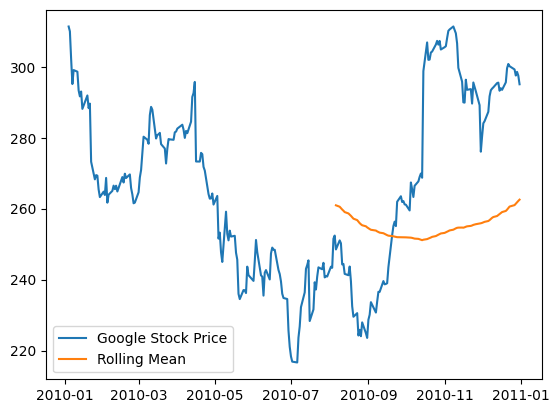

In [36]:
# this allows plots to be rendered in the notebook
%matplotlib inline 

# We import matplotlib into Python
import matplotlib.pyplot as plt

# We plot the Google stock data
plt.plot(all_stocks['Google'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()